In [1]:
import numpy as np
import pandas as pd

## 一、关系型连接
## 1.连接的基本概念

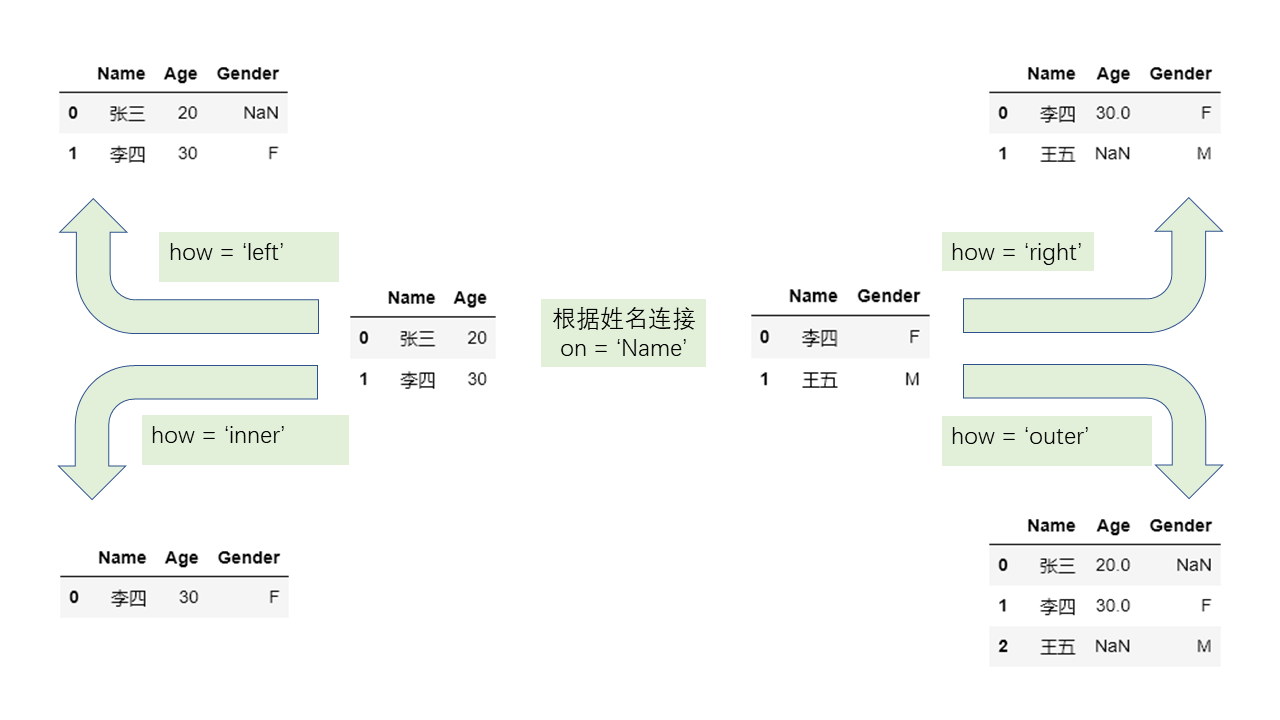

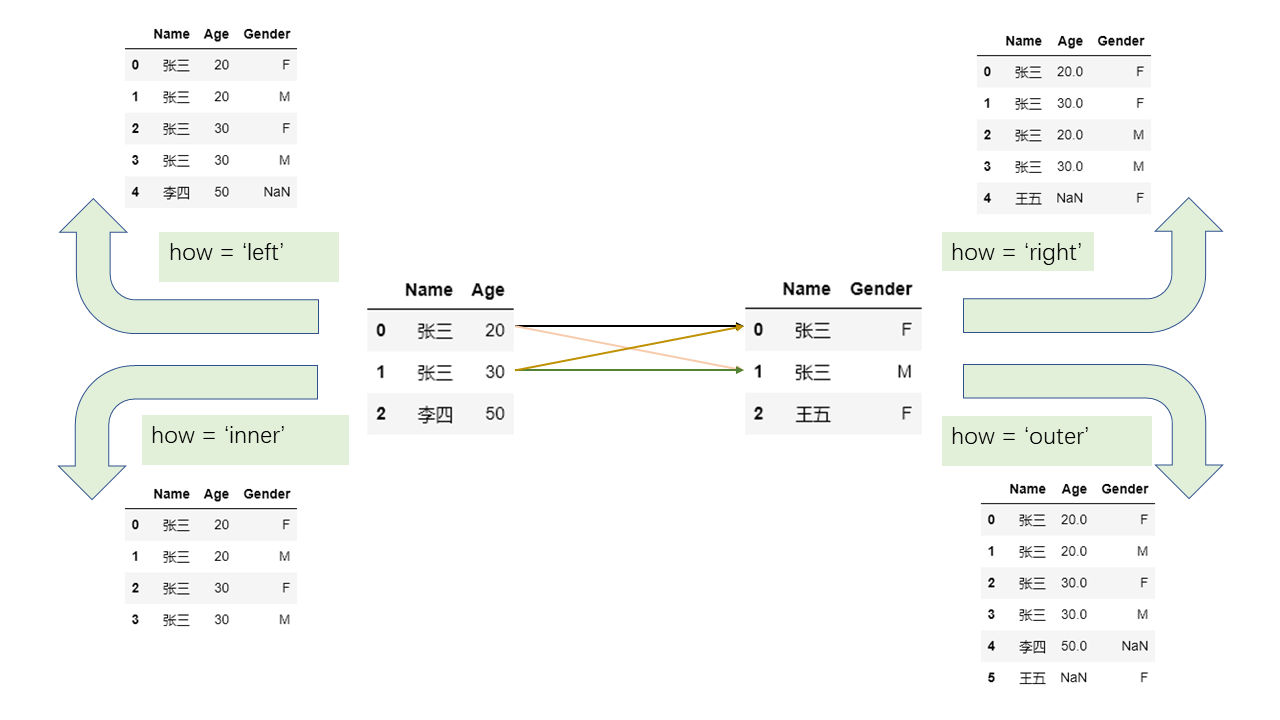

## 2.值连接

In [3]:
df_1 = pd.DataFrame({'Name':['San Zhang','Si Li'],
                     'Age':[20,30]})
df_1

,Name,Age
0,San Zhang,20
1,Si Li,30


In [4]:
df_2 = pd.DataFrame({'Name':['Si Li','Wang Wu'],
                     'Gender':['F','M']})
df_2

,Name,Gender
0,Si Li,F
1,Wang Wu,M


In [6]:
df_1.merge(df_2,on='Name',how = 'left')

,Name,Age,Gender
0,San Zhang,20,NaN
1,Si Li,30,F


#### 如果两个表中想要连接的列  不具备相同的 列名 ，可以通过left_on和right_on指定：

In [7]:
df1 = pd.DataFrame({'df1_name':['San Zhang','Si Li'],
                    'Age':[20,30]})
df1

,df1_name,Age
0,San Zhang,20
1,Si Li,30


In [8]:
df2 = pd.DataFrame({'df2_name':['Si Li','Wu Wang'],
                    'Gender':['F','M']})
df2

,df2_name,Gender
0,Si Li,F
1,Wu Wang,M


In [9]:
df1.merge(df2,left_on='df1_name',right_on='df2_name',how = 'left')

,df1_name,Age,df2_name,Gender
0,San Zhang,20,NaN,NaN
1,Si Li,30,Si Li,F


In [10]:
df1 = pd.DataFrame({'Name':'San Zhang','Grade':[70]})
df1

,Name,Grade
0,San Zhang,70


In [12]:
df2 = pd.DataFrame({'Name':'San Zhang','Grade':[80]})
df2

,Name,Grade
0,San Zhang,80


In [13]:
df1.merge(df2,on='Name',how='left',suffixes=['_Chinese','_Math'])

,Name,Grade_Chinese,Grade_Math
0,San Zhang,70,80


In [14]:
df1 = pd.DataFrame({'Name':['San Zhang','San Zhang'],
                    'Age':[20,21],
                    'Class':['one','two']})
df1

,Name,Age,Class
0,San Zhang,20,one
1,San Zhang,21,two


In [16]:
df2 = pd.DataFrame({'Name':['San Zhang','San Zhang'],
                    'Gender':['F','M'],
                    'Class':['two','one']})
df2

,Name,Gender,Class
0,San Zhang,F,two
1,San Zhang,M,one


In [17]:
df1.merge(df2,on=['Name','Class'],how='left')

,Name,Age,Class,Gender
0,San Zhang,20,one,M
1,San Zhang,21,two,F


In [19]:
df1.merge(df2,on='Name',how='left') #错误的结果

,Name,Age,Class_x,Gender,Class_y
0,San Zhang,20,one,F,two
1,San Zhang,20,one,M,one
2,San Zhang,21,two,F,two
3,San Zhang,21,two,M,one


## 3.索引连接

In [20]:
df1 = pd.DataFrame({'Age':[20,30]},index = pd.Series(['San Zhang','Si Li'],name='Name'))
df1  # 这 就是单层索引

,Age
Name,
San Zhang,20
Si Li,30


In [21]:
df2 = pd.DataFrame({'Gender':['F','M']},index = pd.Series(['Si Li','Wu Wang'],name = 'Name'))
df2

,Gender
Name,
Si Li,F
Wu Wang,M


In [22]:
df1.join(df2,how='left')

,Age,Gender
Name,,
San Zhang,20,NaN
Si Li,30,F


In [23]:
df1 = pd.DataFrame({'Grade':[70]},index = pd.Series(['San Zhang'],name='Name'))
df1

,Grade
Name,
San Zhang,70


In [24]:
df2 = pd.DataFrame({'Grade':[80]},index = pd.Series(['San Zhang'],name='Name'))
df2

,Grade
Name,
San Zhang,80


In [25]:
df1.join(df2,how = 'left',lsuffix='_Chinese',rsuffix='_Math')

,Grade_Chinese,Grade_Math
Name,,
San Zhang,70,80


In [26]:
df1 = pd.DataFrame({'Age':[20,21]},
                   index = pd.MultiIndex.from_arrays(
                   [['San Zhang','San Zhang'],['one','two']],
                   names = ['Name','Class']))   # names = () | [] 似乎都可
df1

Age
Name      Class     
San Zhang one     20
          two     21

In [28]:
df2 = pd.DataFrame({'Gender':['F','M']},
                   index = pd.MultiIndex.from_arrays(
                   [['San Zhang','San Zhang'],['two','one']],
                   names = ('Name','Class')))   # names = () 这里使用括号试试
df2

Gender
Name      Class       
San Zhang two        F
          one        M

In [29]:
df1.join(df2)

Age Gender
Name      Class            
San Zhang one     20      M
          two     21      F

## 二、方向连接
## 1.concat

#### 例如，纵向合并各表中人的信息：

In [30]:
df1 = pd.DataFrame({'Name':['San Zhang','Si Li'],
                    'Age':[20,30]})
df2 = pd.DataFrame({'Name':['Wu Wang'],'Age':[40]}) # 一列仅有一个值记得用[ ],列表

In [31]:
df1

,Name,Age
0,San Zhang,20
1,Si Li,30


In [32]:
df2

,Name,Age
0,Wu Wang,40


In [33]:
pd.concat([df1,df2])  # 默认 axis=0，纵向连接

,Name,Age
0,San Zhang,20
1,Si Li,30
0,Wu Wang,40


#### 横向合并各表中的字段：

In [ ]:
df2